# Ice Draft

This draft notebook plots the ice draft (which is static) for the Ocean0 runs.

It also shows how you can open the files in python.

Xylar also has many plotting and data processing scripts in the Google Drive, including checking for anomalous data structures.

In [7]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import cmocean as cm

from netCDF4 import Dataset
import os.path
import matplotlib.colors as colors

Models: 
```
COCO   MITgcm-BAS          MITgcm-JPL  MOM6_SIGMA_ZSTAR  NEMO-CNRS      POP2x
FVCOM  MITgcm_BAS_Coupled  MOM6        MPAS-Ocean        NEMO-UKESM1is  ROMS-UTAS
```

In [8]:
## folder where the isomip-plus github repo is located
baserepo = '/g/data/x77/cy8964/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/g/data/x77/cy8964/ISOMIP+Data-new/'

# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)


# Ice Draft

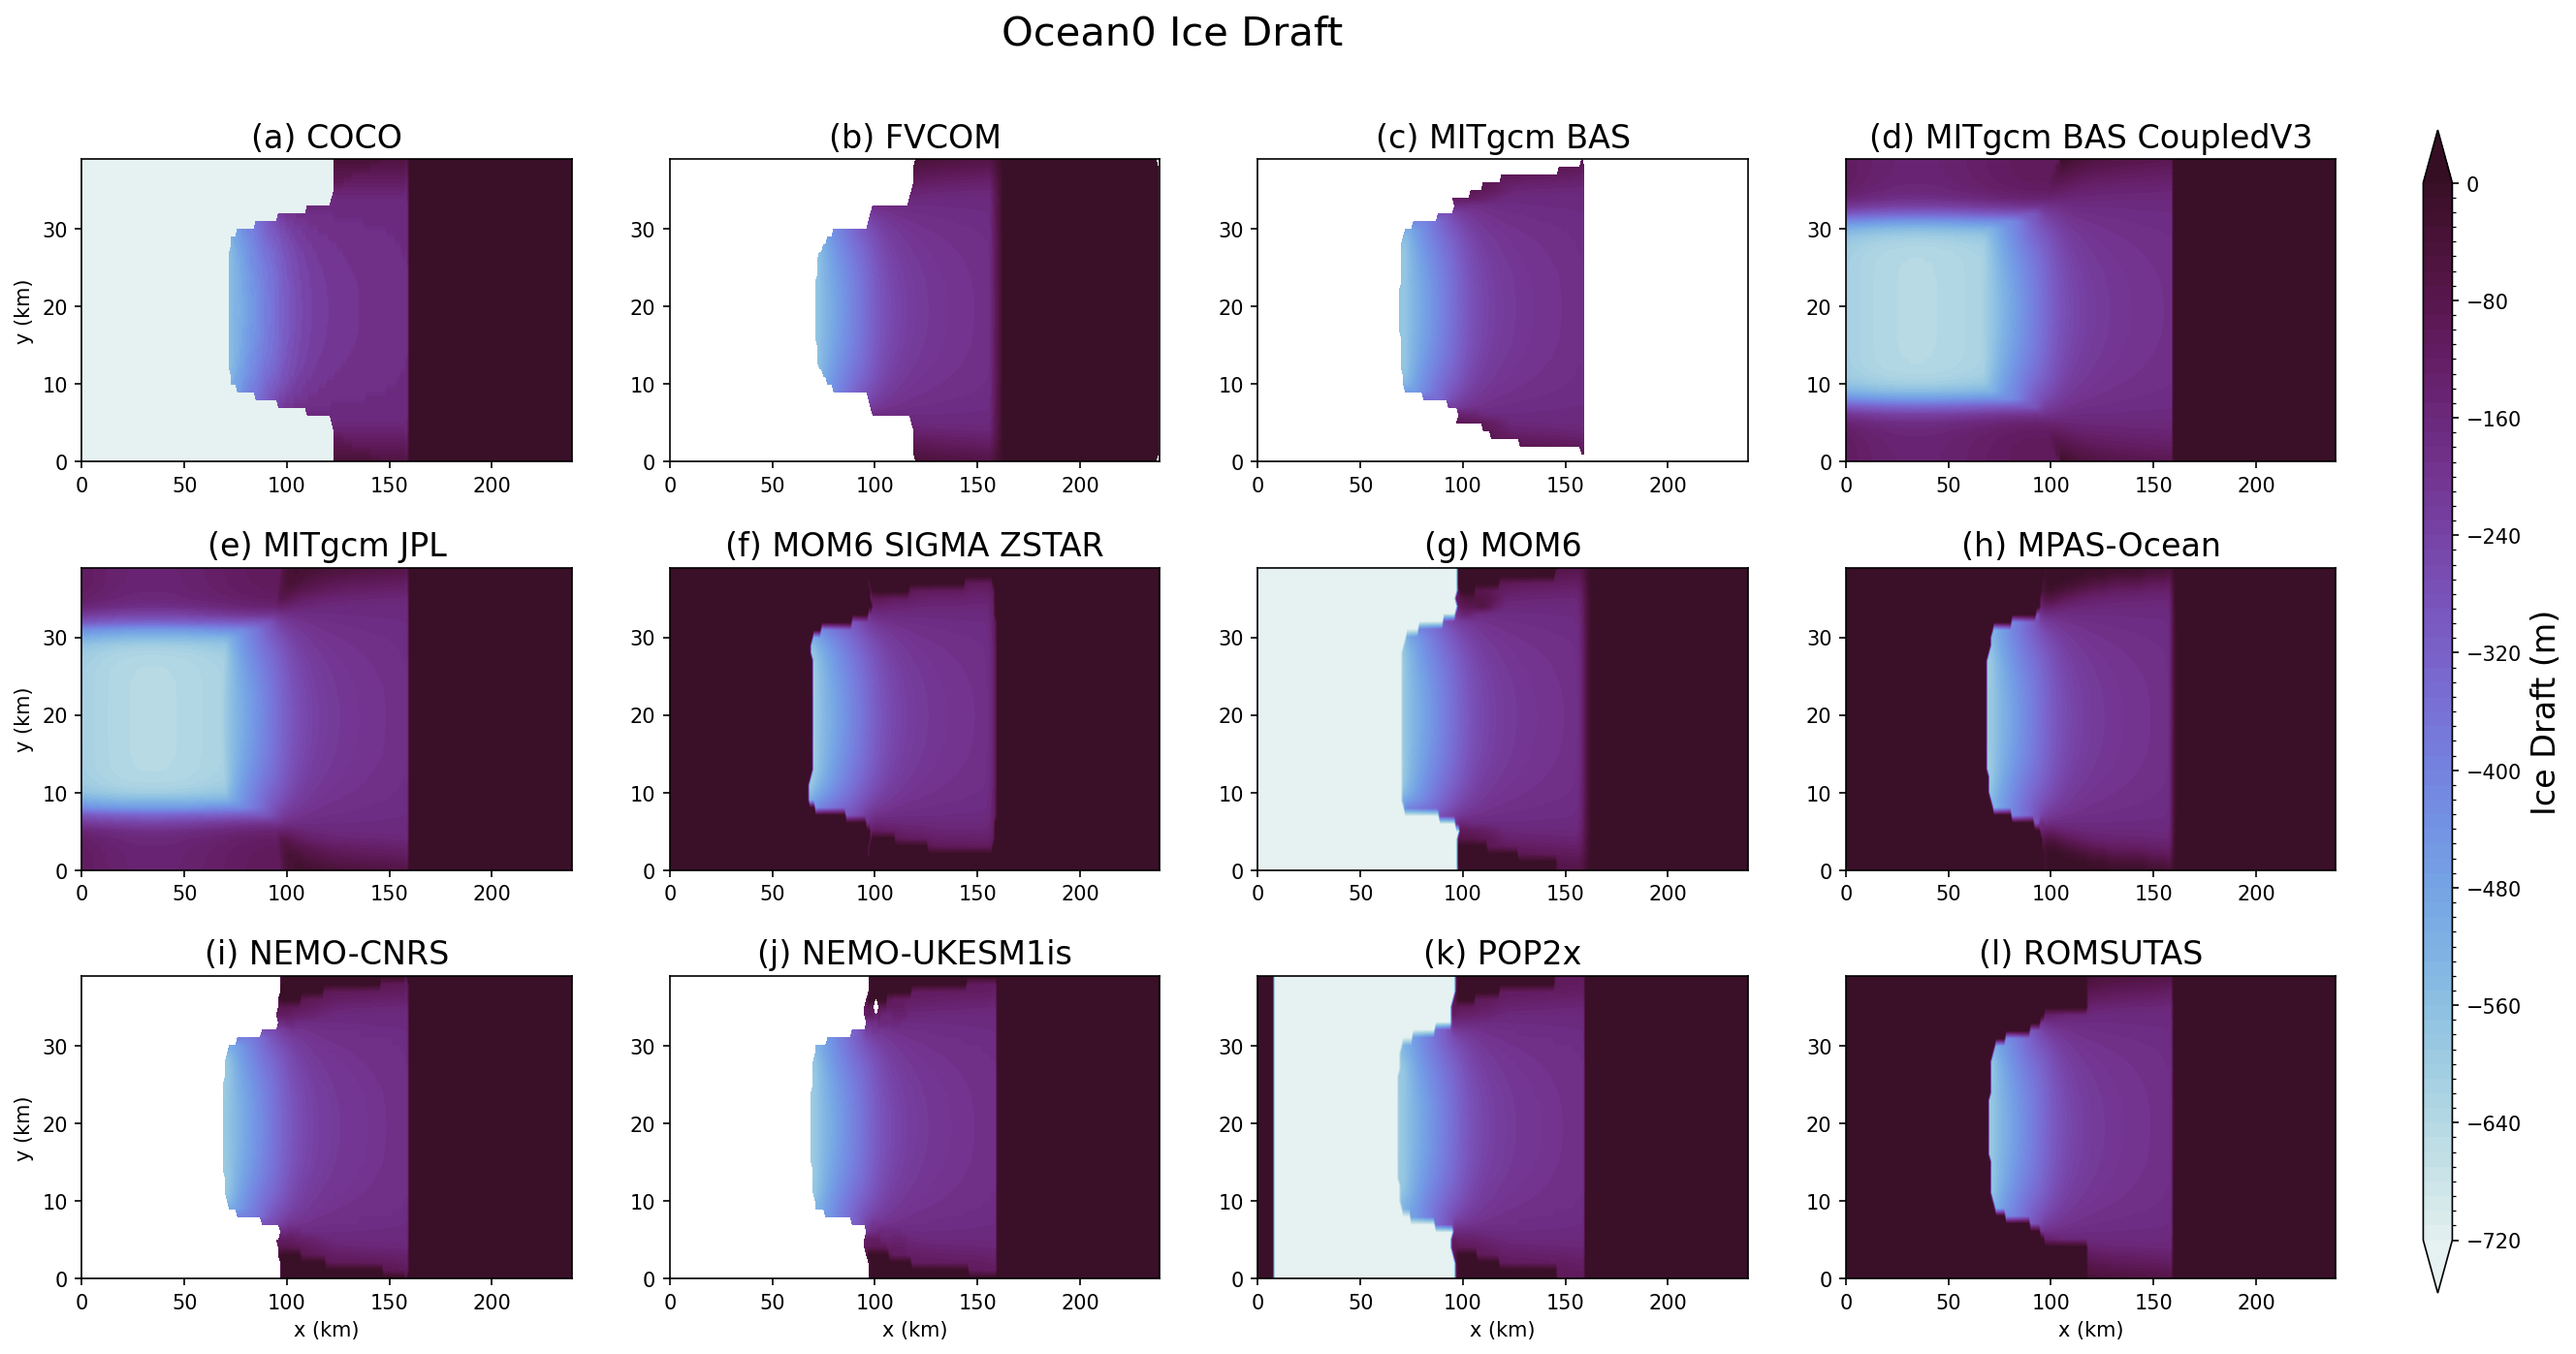

In [3]:
expt = Ocean0_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
time = 0
for i in np.arange(length):
    plt.subplot(3,nrows,i+1)
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    try:
        draft = data.iceDraft.isel(nTime = time)
    except ValueError:
        draft = data.iceDraft#.isel(nTime = time)
    c = (-1*np.abs((draft))).plot.contourf(cmap = cm.cm.dense, levels = np.linspace(-720,0,73), extend = 'both',add_colorbar = False)#, cbar_kwargs = {'label':'Overturning \n Streamfunction (Sv)'},extend = 'both')
    plt.title('('+alphabet[i]+') '+labels[i], fontsize = 16)
    if (i==0) or (i==4) or (i==8):
        plt.ylabel('y (km)')
    else:
        plt.ylabel('')
    if i>=8:
        plt.xlabel('x (km)')
    else:
        plt.xlabel('')

cax = plt.axes([0.93,0.1,0.01,0.8])
cbar = plt.colorbar(c, cax = cax)
cbar.ax.set_ylabel('Ice Draft (m)', fontsize = 16)
fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean0 Ice Draft', fontsize = 20);

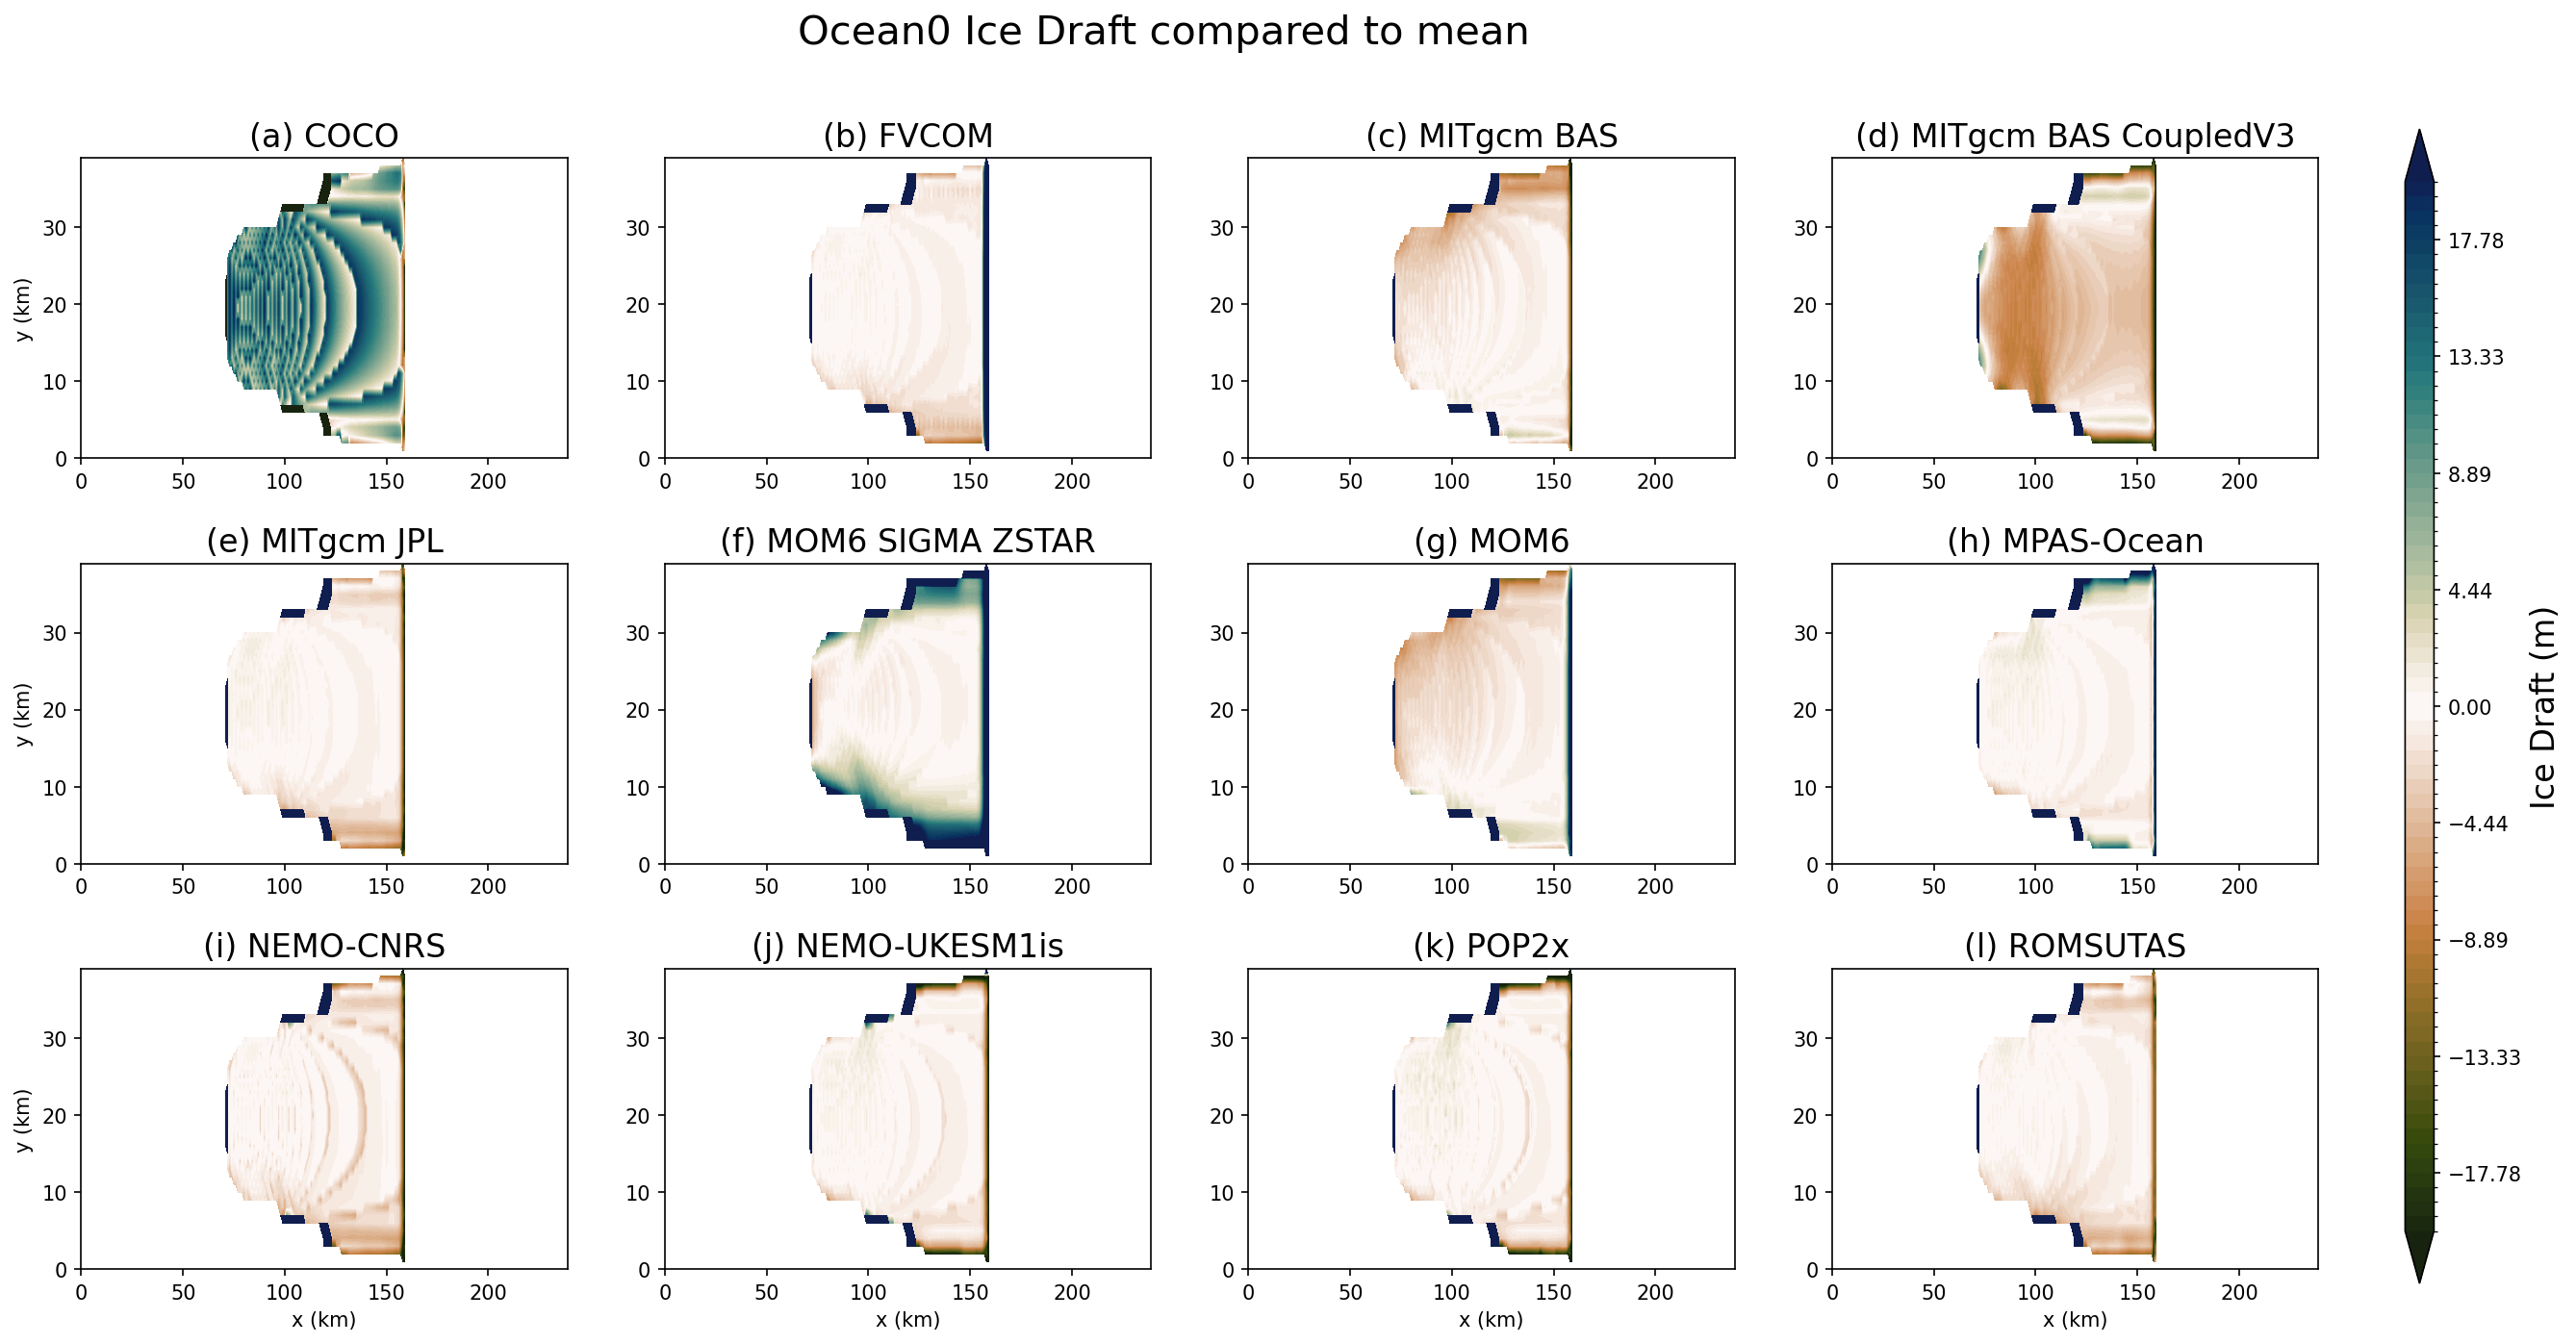

In [6]:
expt = Ocean0_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))

i = 0

data = xr.open_dataset(basedrive+expt[i], decode_times=False)
try:
    draft = data.iceDraft.isel(nTime = time)
except ValueError:
    draft = data.iceDraft#.isel(nTime = time)
ice_draft = np.zeros_like(draft)

for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    try:
        draft = data.iceDraft.isel(nTime = time)
    except ValueError:
        draft = data.iceDraft#.isel(nTime = time)
    ice_draft = ice_draft + np.abs(draft.values)

ice_draft = ice_draft/12

fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
time = 0
for i in np.arange(length):
    plt.subplot(3,nrows,i+1)
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    try:
        draft = data.iceDraft.isel(nTime = time)
    except ValueError:
        draft = data.iceDraft#.isel(nTime = time)
    c = (ice_draft-np.abs(draft)).plot.contourf(cmap = cm.cm.tarn, levels = np.linspace(-20,20,73), extend = 'both',add_colorbar = False)#, cbar_kwargs = {'label':'Overturning \n Streamfunction (Sv)'},extend = 'both')
    plt.title('('+alphabet[i]+') '+labels[i], fontsize = 16)
    if (i==0) or (i==4) or (i==8):
        plt.ylabel('y (km)')
    else:
        plt.ylabel('')
    if i>=8:
        plt.xlabel('x (km)')
    else:
        plt.xlabel('')

cax = plt.axes([0.93,0.1,0.01,0.8])
cbar = plt.colorbar(c, cax = cax)
cbar.ax.set_ylabel('Ice Draft (m)', fontsize = 16)
fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean0 Ice Draft compared to mean', fontsize = 20);

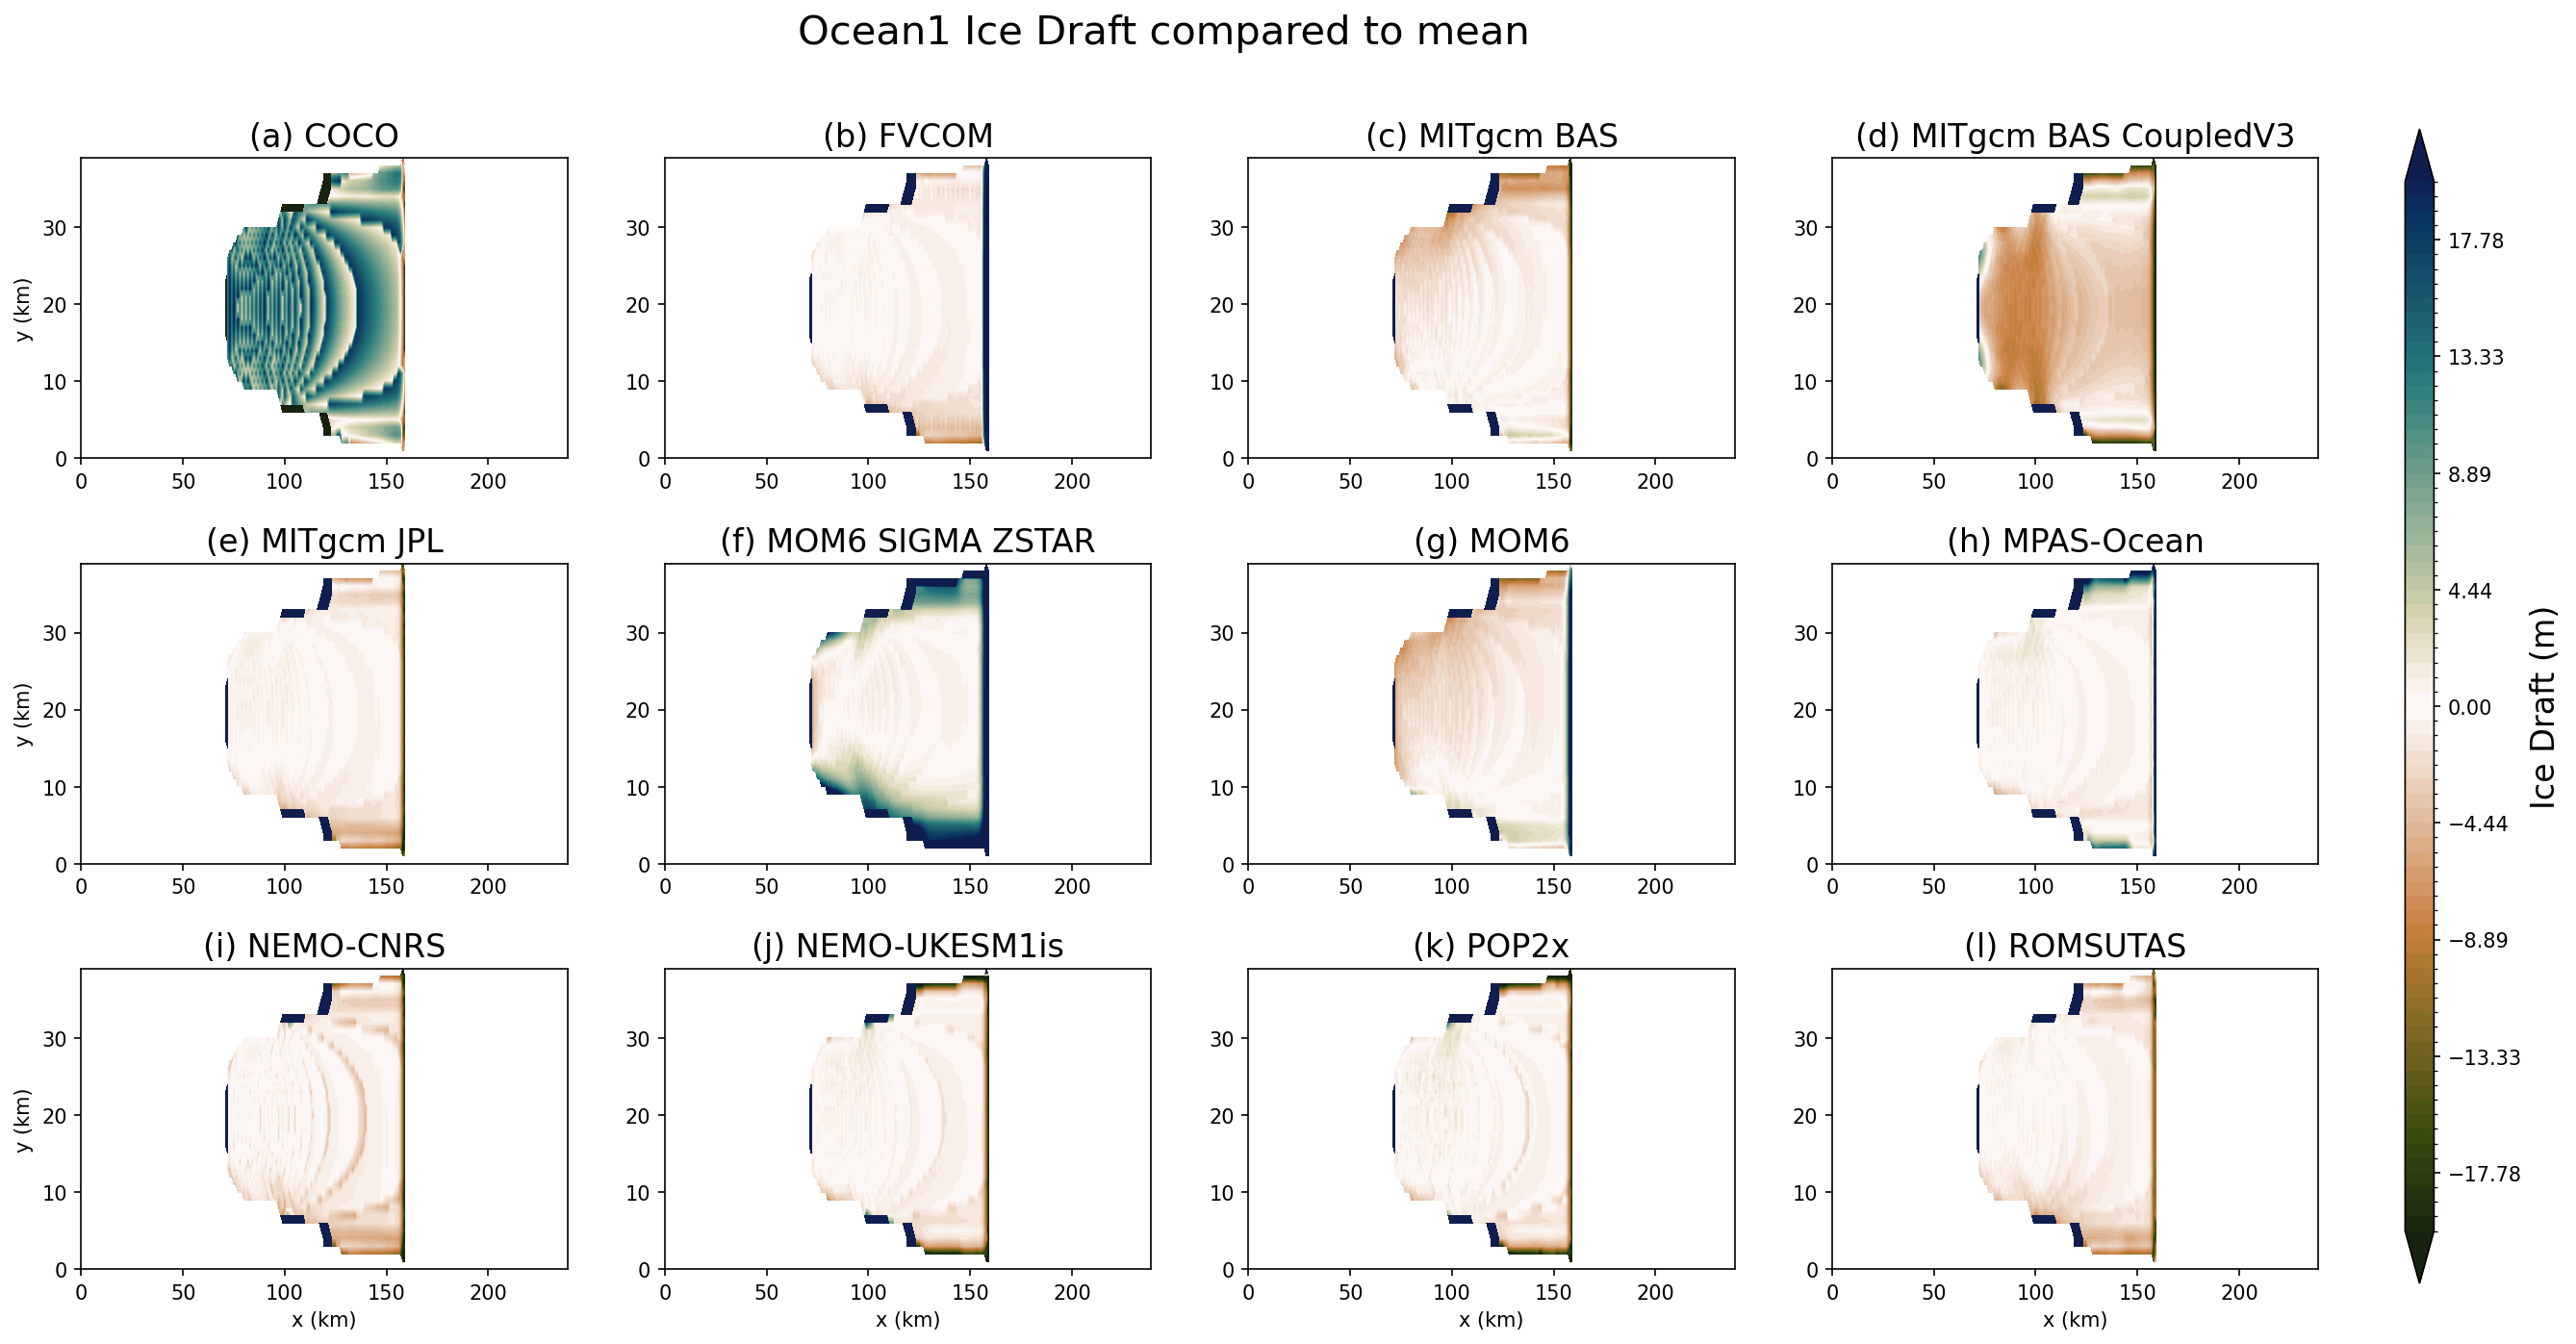

In [4]:
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))

i = 0

data = xr.open_dataset(basedrive+expt[i], decode_times=False)
try:
    draft = data.iceDraft.isel(nTime = time)
except ValueError:
    draft = data.iceDraft#.isel(nTime = time)
ice_draft = np.zeros_like(draft)

for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    try:
        draft = data.iceDraft.isel(nTime = time)
    except ValueError:
        draft = data.iceDraft#.isel(nTime = time)
    ice_draft = ice_draft + np.abs(draft.values)

ice_draft = ice_draft/12

fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
time = 0
for i in np.arange(length):
    plt.subplot(3,nrows,i+1)
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    try:
        draft = data.iceDraft.isel(nTime = time)
    except ValueError:
        draft = data.iceDraft#.isel(nTime = time)
    c = (ice_draft-np.abs(draft)).plot.contourf(cmap = cm.cm.tarn, levels = np.linspace(-20,20,73), extend = 'both',add_colorbar = False)#, cbar_kwargs = {'label':'Overturning \n Streamfunction (Sv)'},extend = 'both')
    plt.title('('+alphabet[i]+') '+labels[i], fontsize = 16)
    if (i==0) or (i==4) or (i==8):
        plt.ylabel('y (km)')
    else:
        plt.ylabel('')
    if i>=8:
        plt.xlabel('x (km)')
    else:
        plt.xlabel('')

cax = plt.axes([0.93,0.1,0.01,0.8])
cbar = plt.colorbar(c, cax = cax)
cbar.ax.set_ylabel('Ice Draft (m)', fontsize = 16)
fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean1 Ice Draft compared to mean', fontsize = 20);

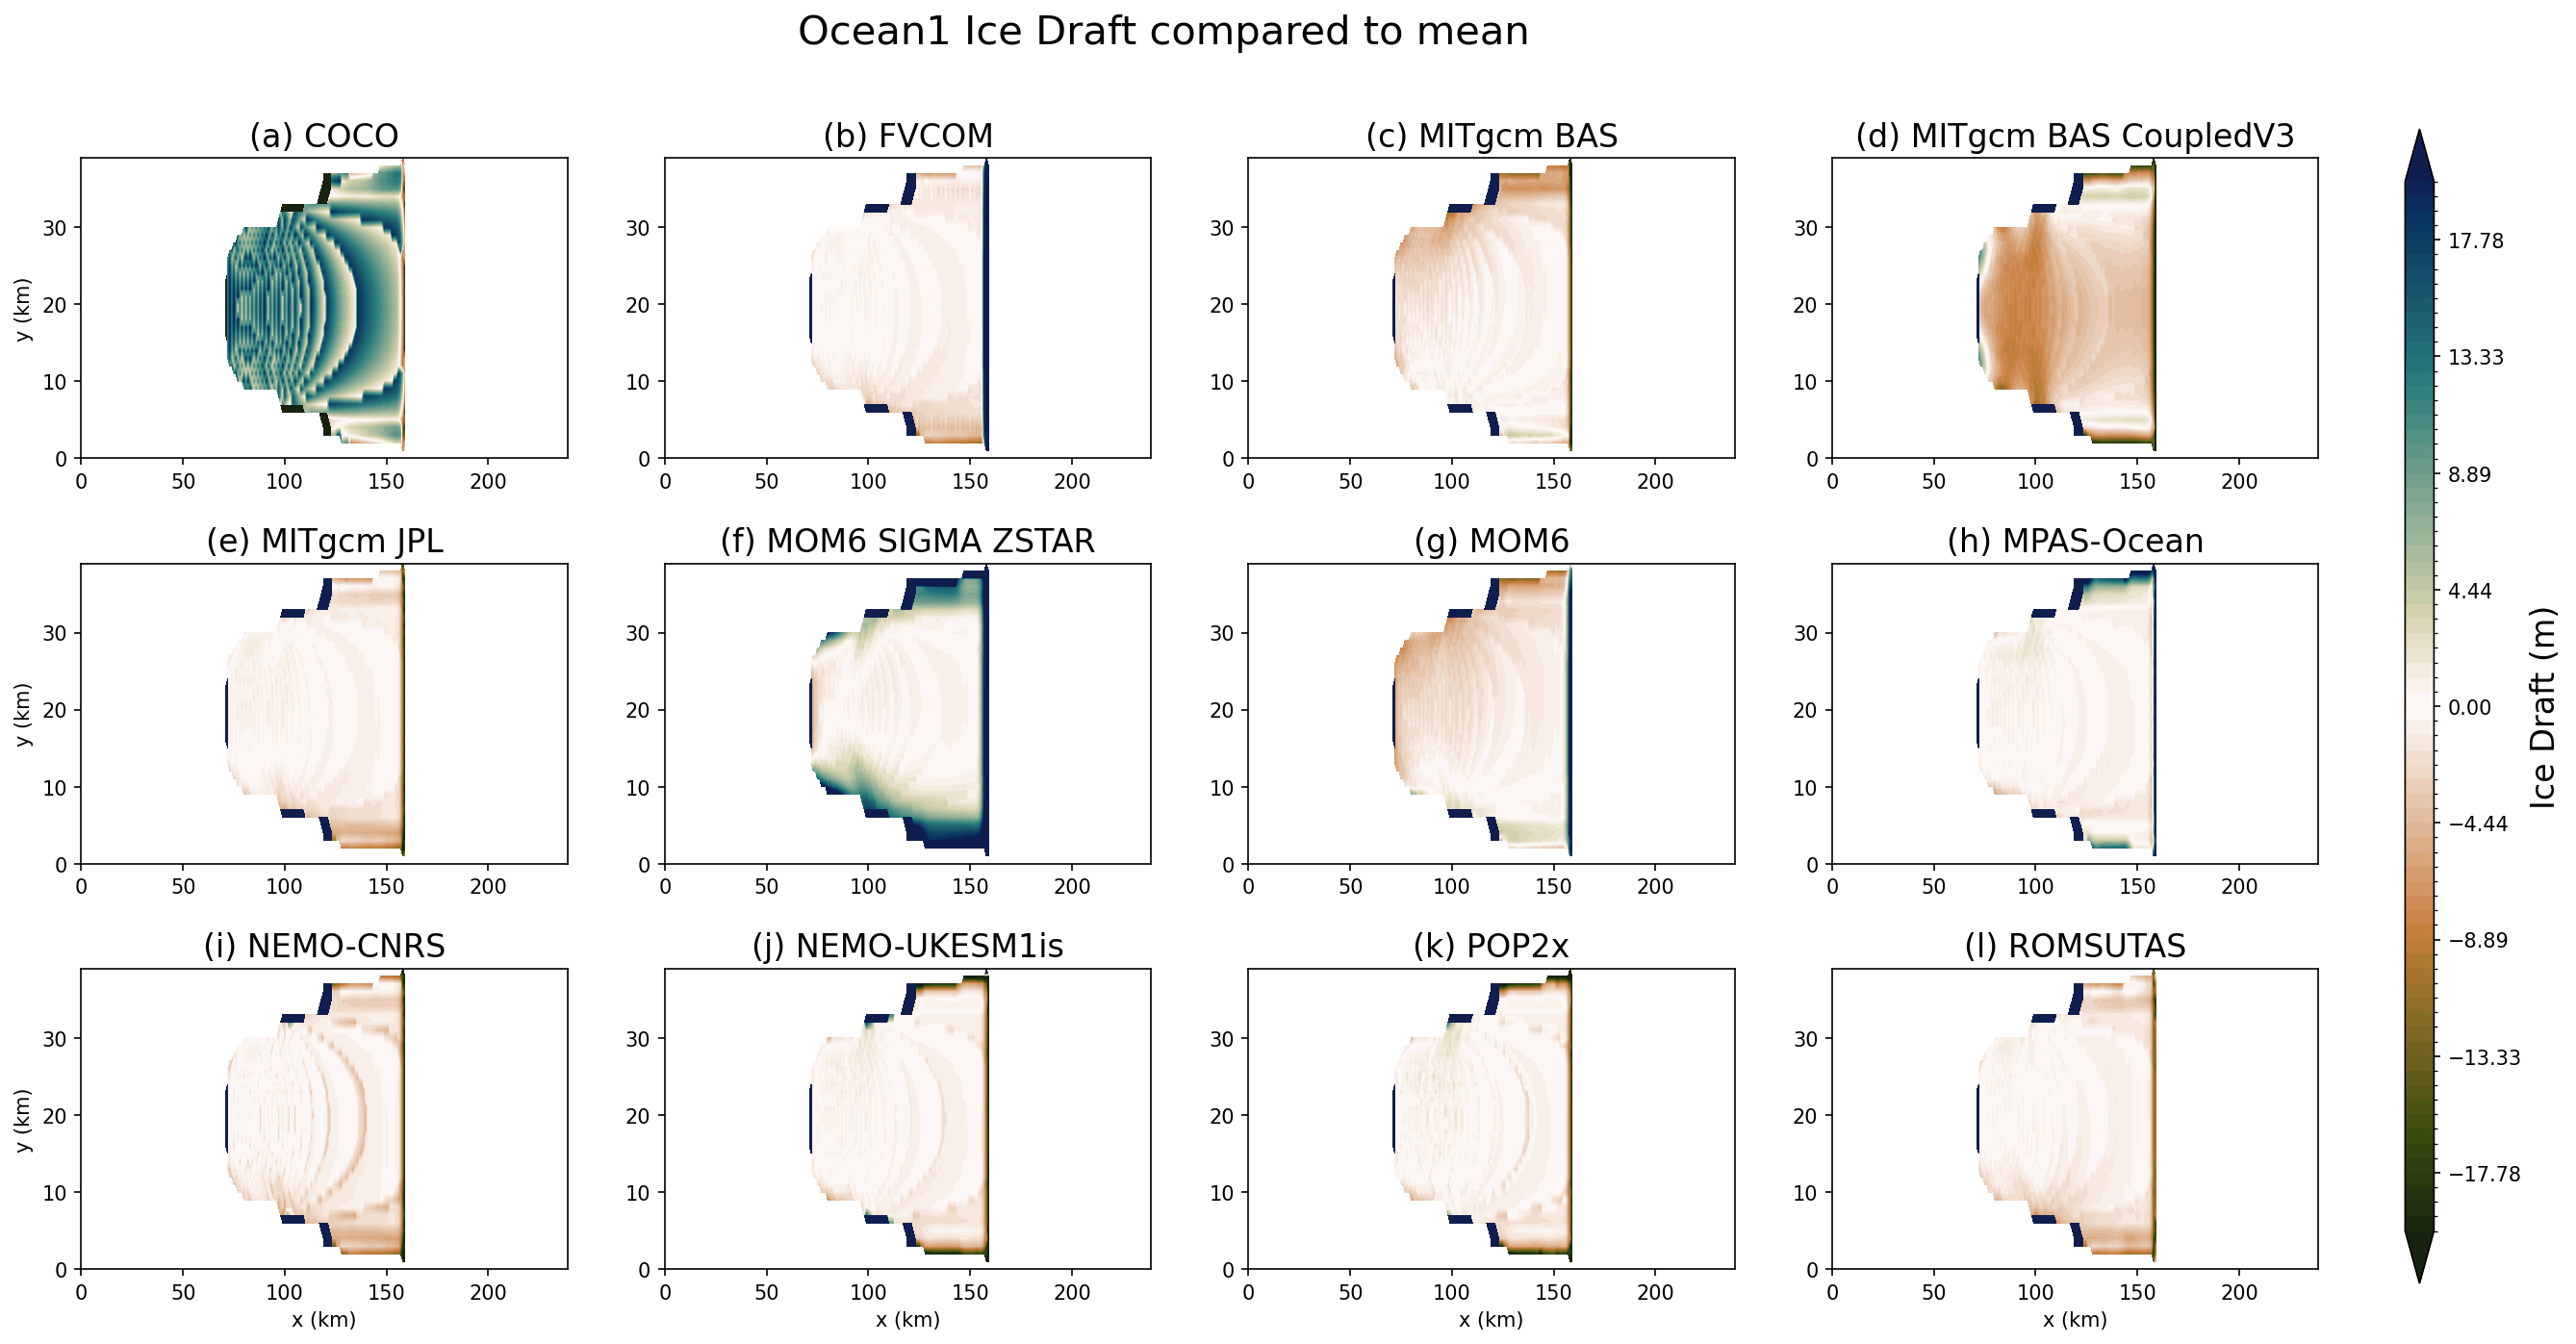

In [9]:
expt = Ocean1_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))

i = 0

data = xr.open_dataset(basedrive+expt[i], decode_times=False)
try:
    draft = data.iceDraft.isel(nTime = time)
except ValueError:
    draft = data.iceDraft#.isel(nTime = time)
ice_draft = np.zeros_like(draft)

for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    try:
        draft = data.iceDraft.isel(nTime = time)
    except ValueError:
        draft = data.iceDraft#.isel(nTime = time)
    ice_draft = ice_draft + np.abs(draft.values)

ice_draft = ice_draft/12

fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
time = -1
for i in np.arange(length):
    plt.subplot(3,nrows,i+1)
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    try:
        draft = data.iceDraft.isel(nTime = time)
    except ValueError:
        draft = data.iceDraft#.isel(nTime = time)
    c = (ice_draft-np.abs(draft)).plot.contourf(cmap = cm.cm.tarn, levels = np.linspace(-20,20,73), extend = 'both',add_colorbar = False)#, cbar_kwargs = {'label':'Overturning \n Streamfunction (Sv)'},extend = 'both')
    plt.title('('+alphabet[i]+') '+labels[i], fontsize = 16)
    if (i==0) or (i==4) or (i==8):
        plt.ylabel('y (km)')
    else:
        plt.ylabel('')
    if i>=8:
        plt.xlabel('x (km)')
    else:
        plt.xlabel('')

cax = plt.axes([0.93,0.1,0.01,0.8])
cbar = plt.colorbar(c, cax = cax)
cbar.ax.set_ylabel('Ice Draft (m)', fontsize = 16)
fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean1 Ice Draft compared to mean', fontsize = 20);

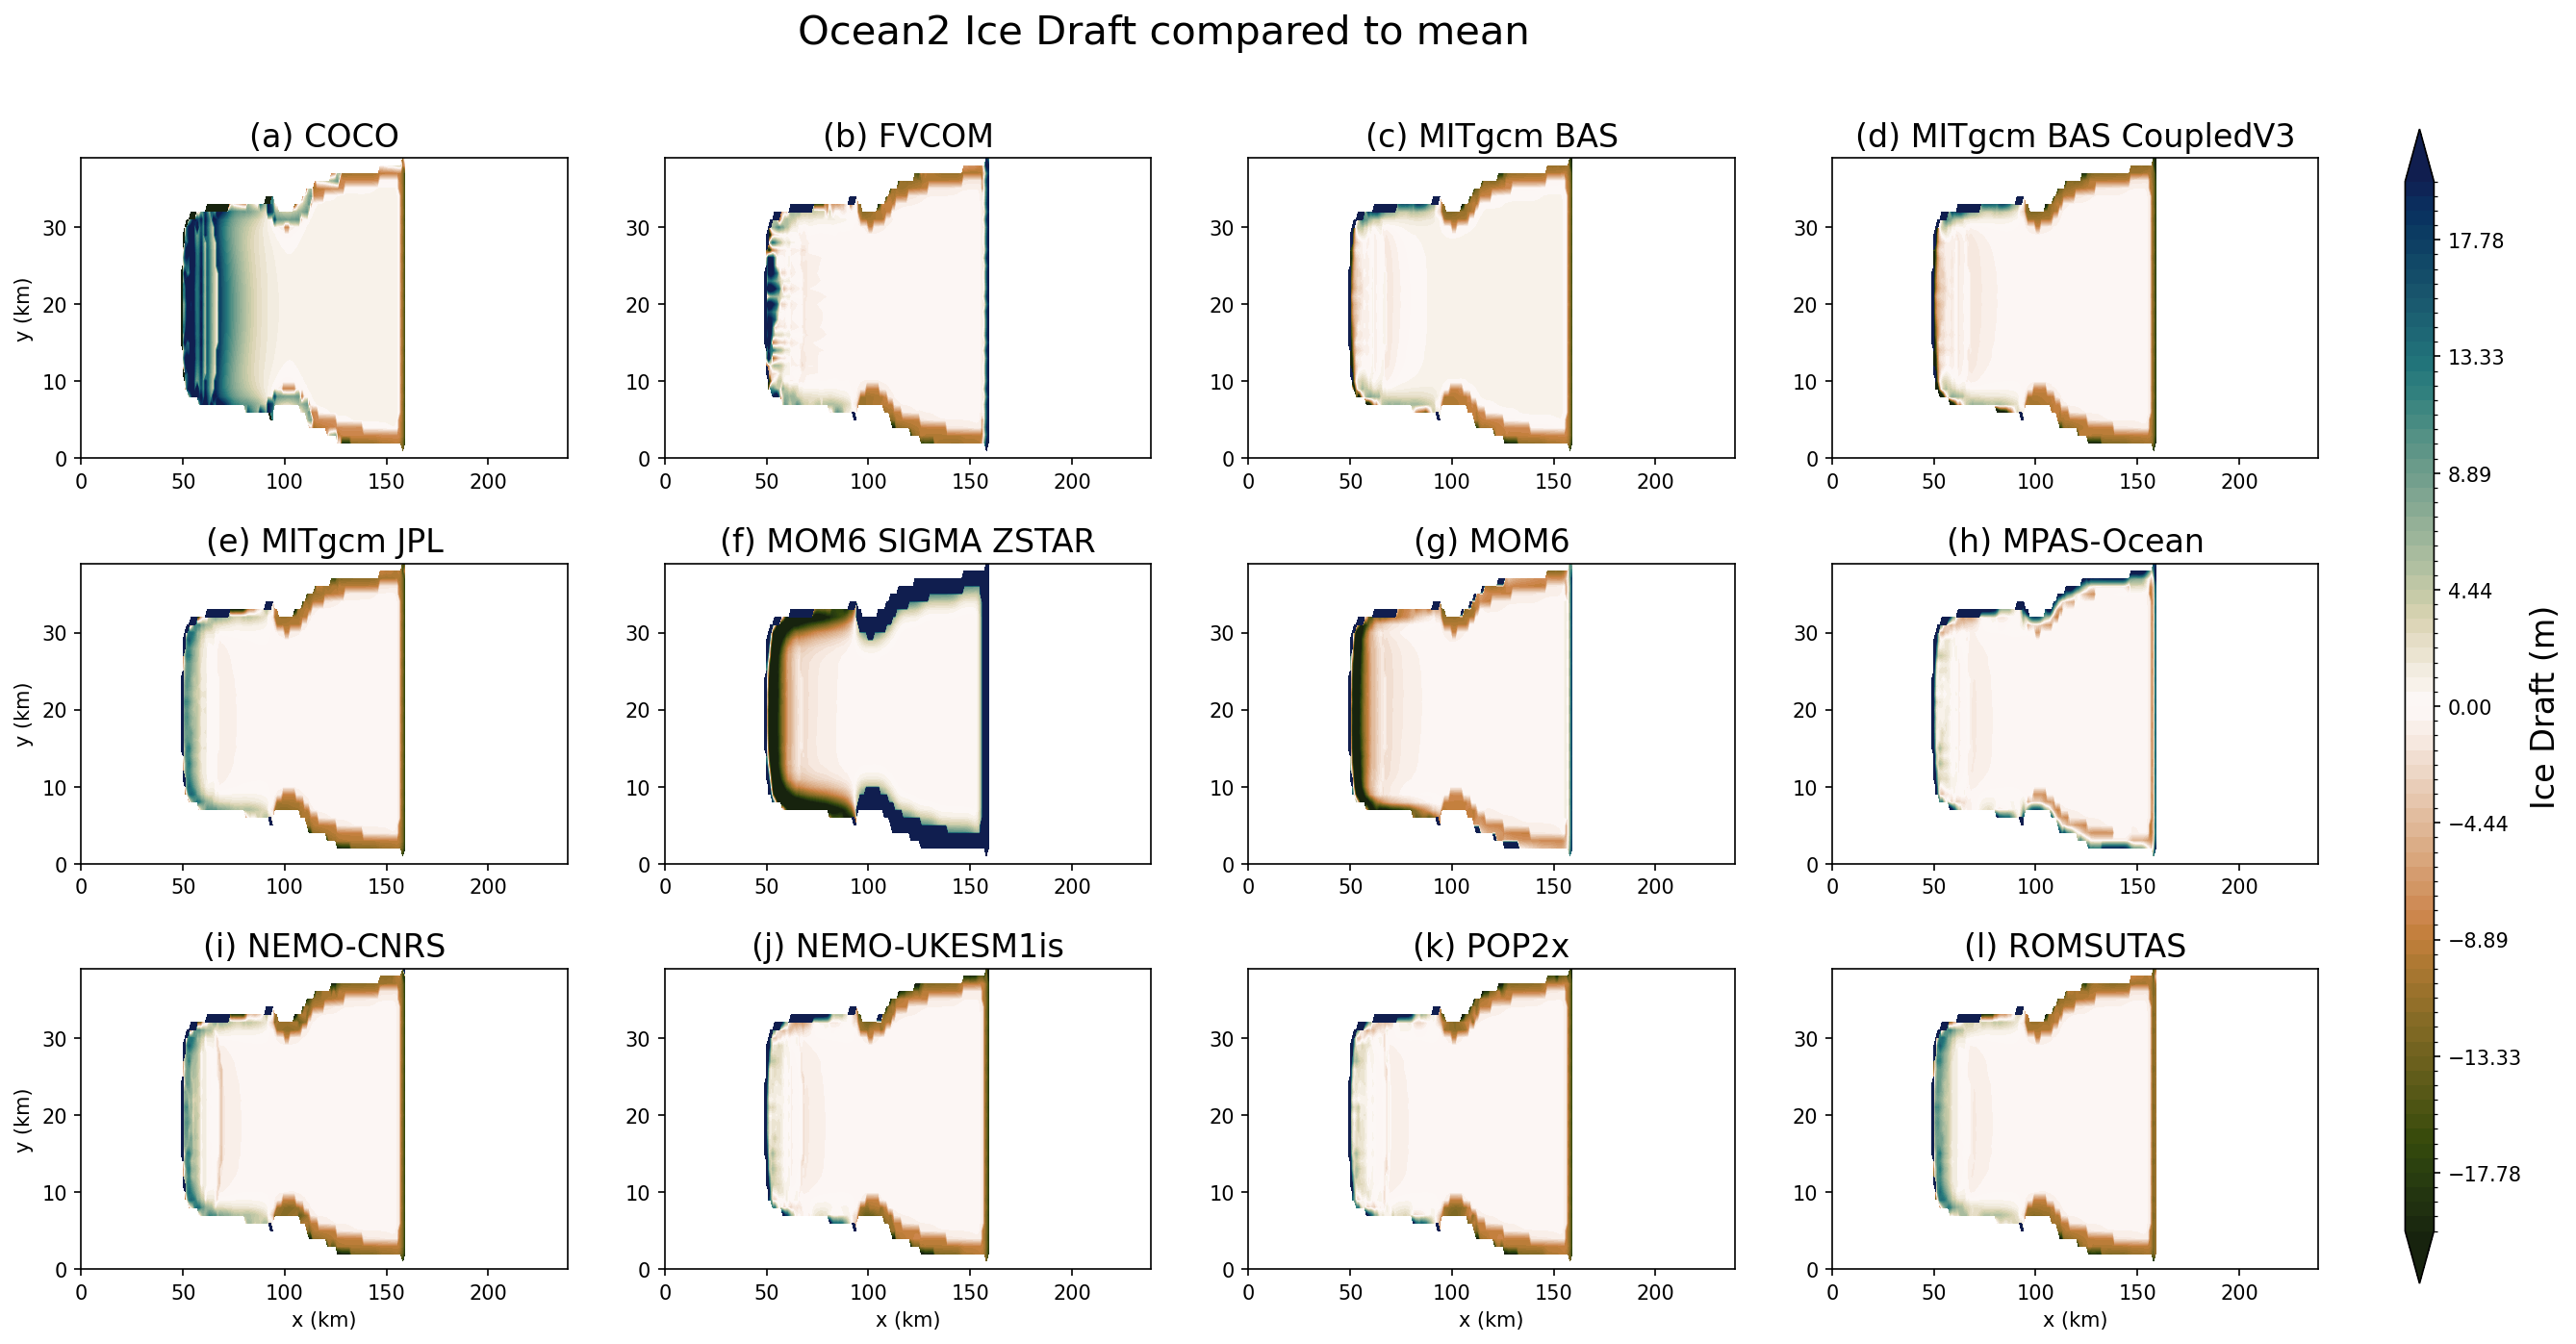

In [5]:
expt = Ocean2_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)

length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))

i = 0

data = xr.open_dataset(basedrive+expt[i], decode_times=False)
try:
    draft = data.iceDraft.isel(nTime = time)
except ValueError:
    draft = data.iceDraft#.isel(nTime = time)
ice_draft = np.zeros_like(draft)

for i in np.arange(length):
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    try:
        draft = data.iceDraft.isel(nTime = time)
    except ValueError:
        draft = data.iceDraft#.isel(nTime = time)
    ice_draft = ice_draft + np.abs(draft.values)

ice_draft = ice_draft/12

fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
time = 0
for i in np.arange(length):
    plt.subplot(3,nrows,i+1)
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    try:
        draft = data.iceDraft.isel(nTime = time)
    except ValueError:
        draft = data.iceDraft#.isel(nTime = time)
    c = (ice_draft-np.abs(draft)).plot.contourf(cmap = cm.cm.tarn, levels = np.linspace(-20,20,73), extend = 'both',add_colorbar = False)#, cbar_kwargs = {'label':'Overturning \n Streamfunction (Sv)'},extend = 'both')
    plt.title('('+alphabet[i]+') '+labels[i], fontsize = 16)
    if (i==0) or (i==4) or (i==8):
        plt.ylabel('y (km)')
    else:
        plt.ylabel('')
    if i>=8:
        plt.xlabel('x (km)')
    else:
        plt.xlabel('')

cax = plt.axes([0.93,0.1,0.01,0.8])
cbar = plt.colorbar(c, cax = cax)
cbar.ax.set_ylabel('Ice Draft (m)', fontsize = 16)
fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean2 Ice Draft compared to mean', fontsize = 20);

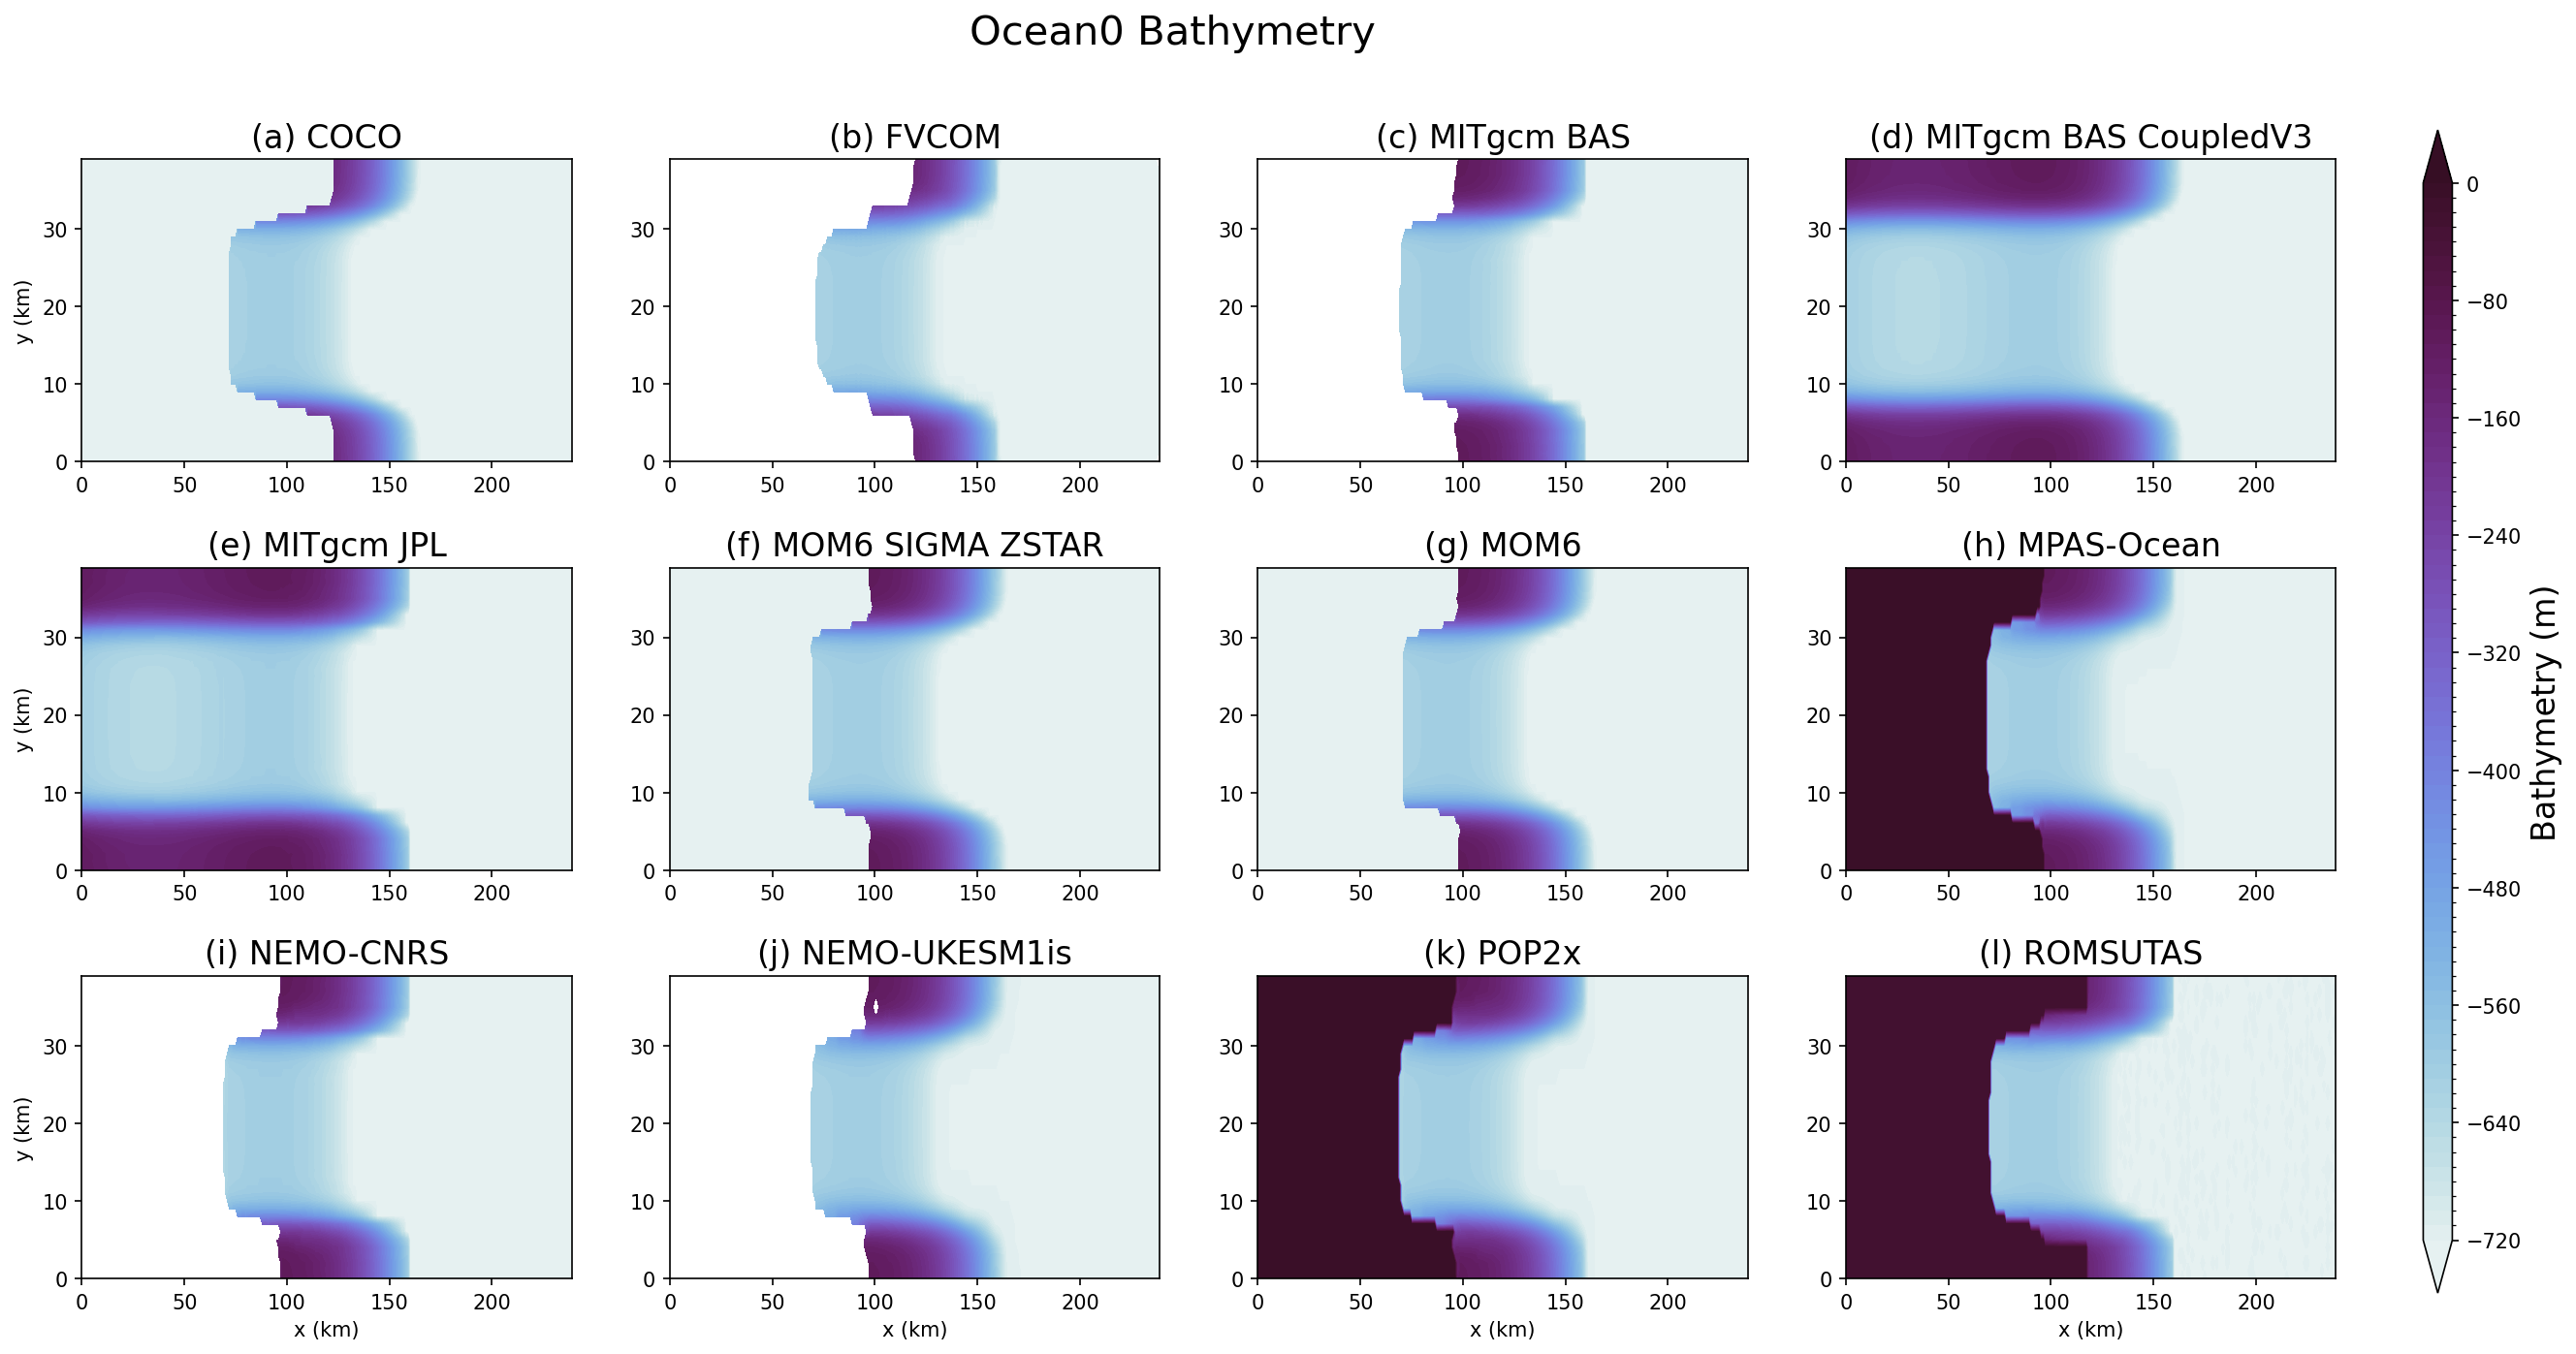

In [17]:
expt = Ocean0_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
time = 0
for i in np.arange(length):
    plt.subplot(3,nrows,i+1)
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    try:
        bathy = data.bathymetry.isel(nTime = time)
    except ValueError:
        bathy = data.bathymetry#.isel(nTime = time)
    c = (-1*np.abs((bathy))).plot.contourf(cmap = cm.cm.dense, levels = np.linspace(-720,0,73), extend = 'both',add_colorbar = False)#, cbar_kwargs = {'label':'Overturning \n Streamfunction (Sv)'},extend = 'both')
    plt.title('('+alphabet[i]+') '+labels[i], fontsize = 16)
    if (i==0) or (i==4) or (i==8):
        plt.ylabel('y (km)')
    else:
        plt.ylabel('')
    if i>=8:
        plt.xlabel('x (km)')
    else:
        plt.xlabel('')

cax = plt.axes([0.93,0.1,0.01,0.8])
cbar = plt.colorbar(c, cax = cax)
cbar.ax.set_ylabel('Bathymetry (m)', fontsize = 16)
fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean0 Bathymetry', fontsize = 20);

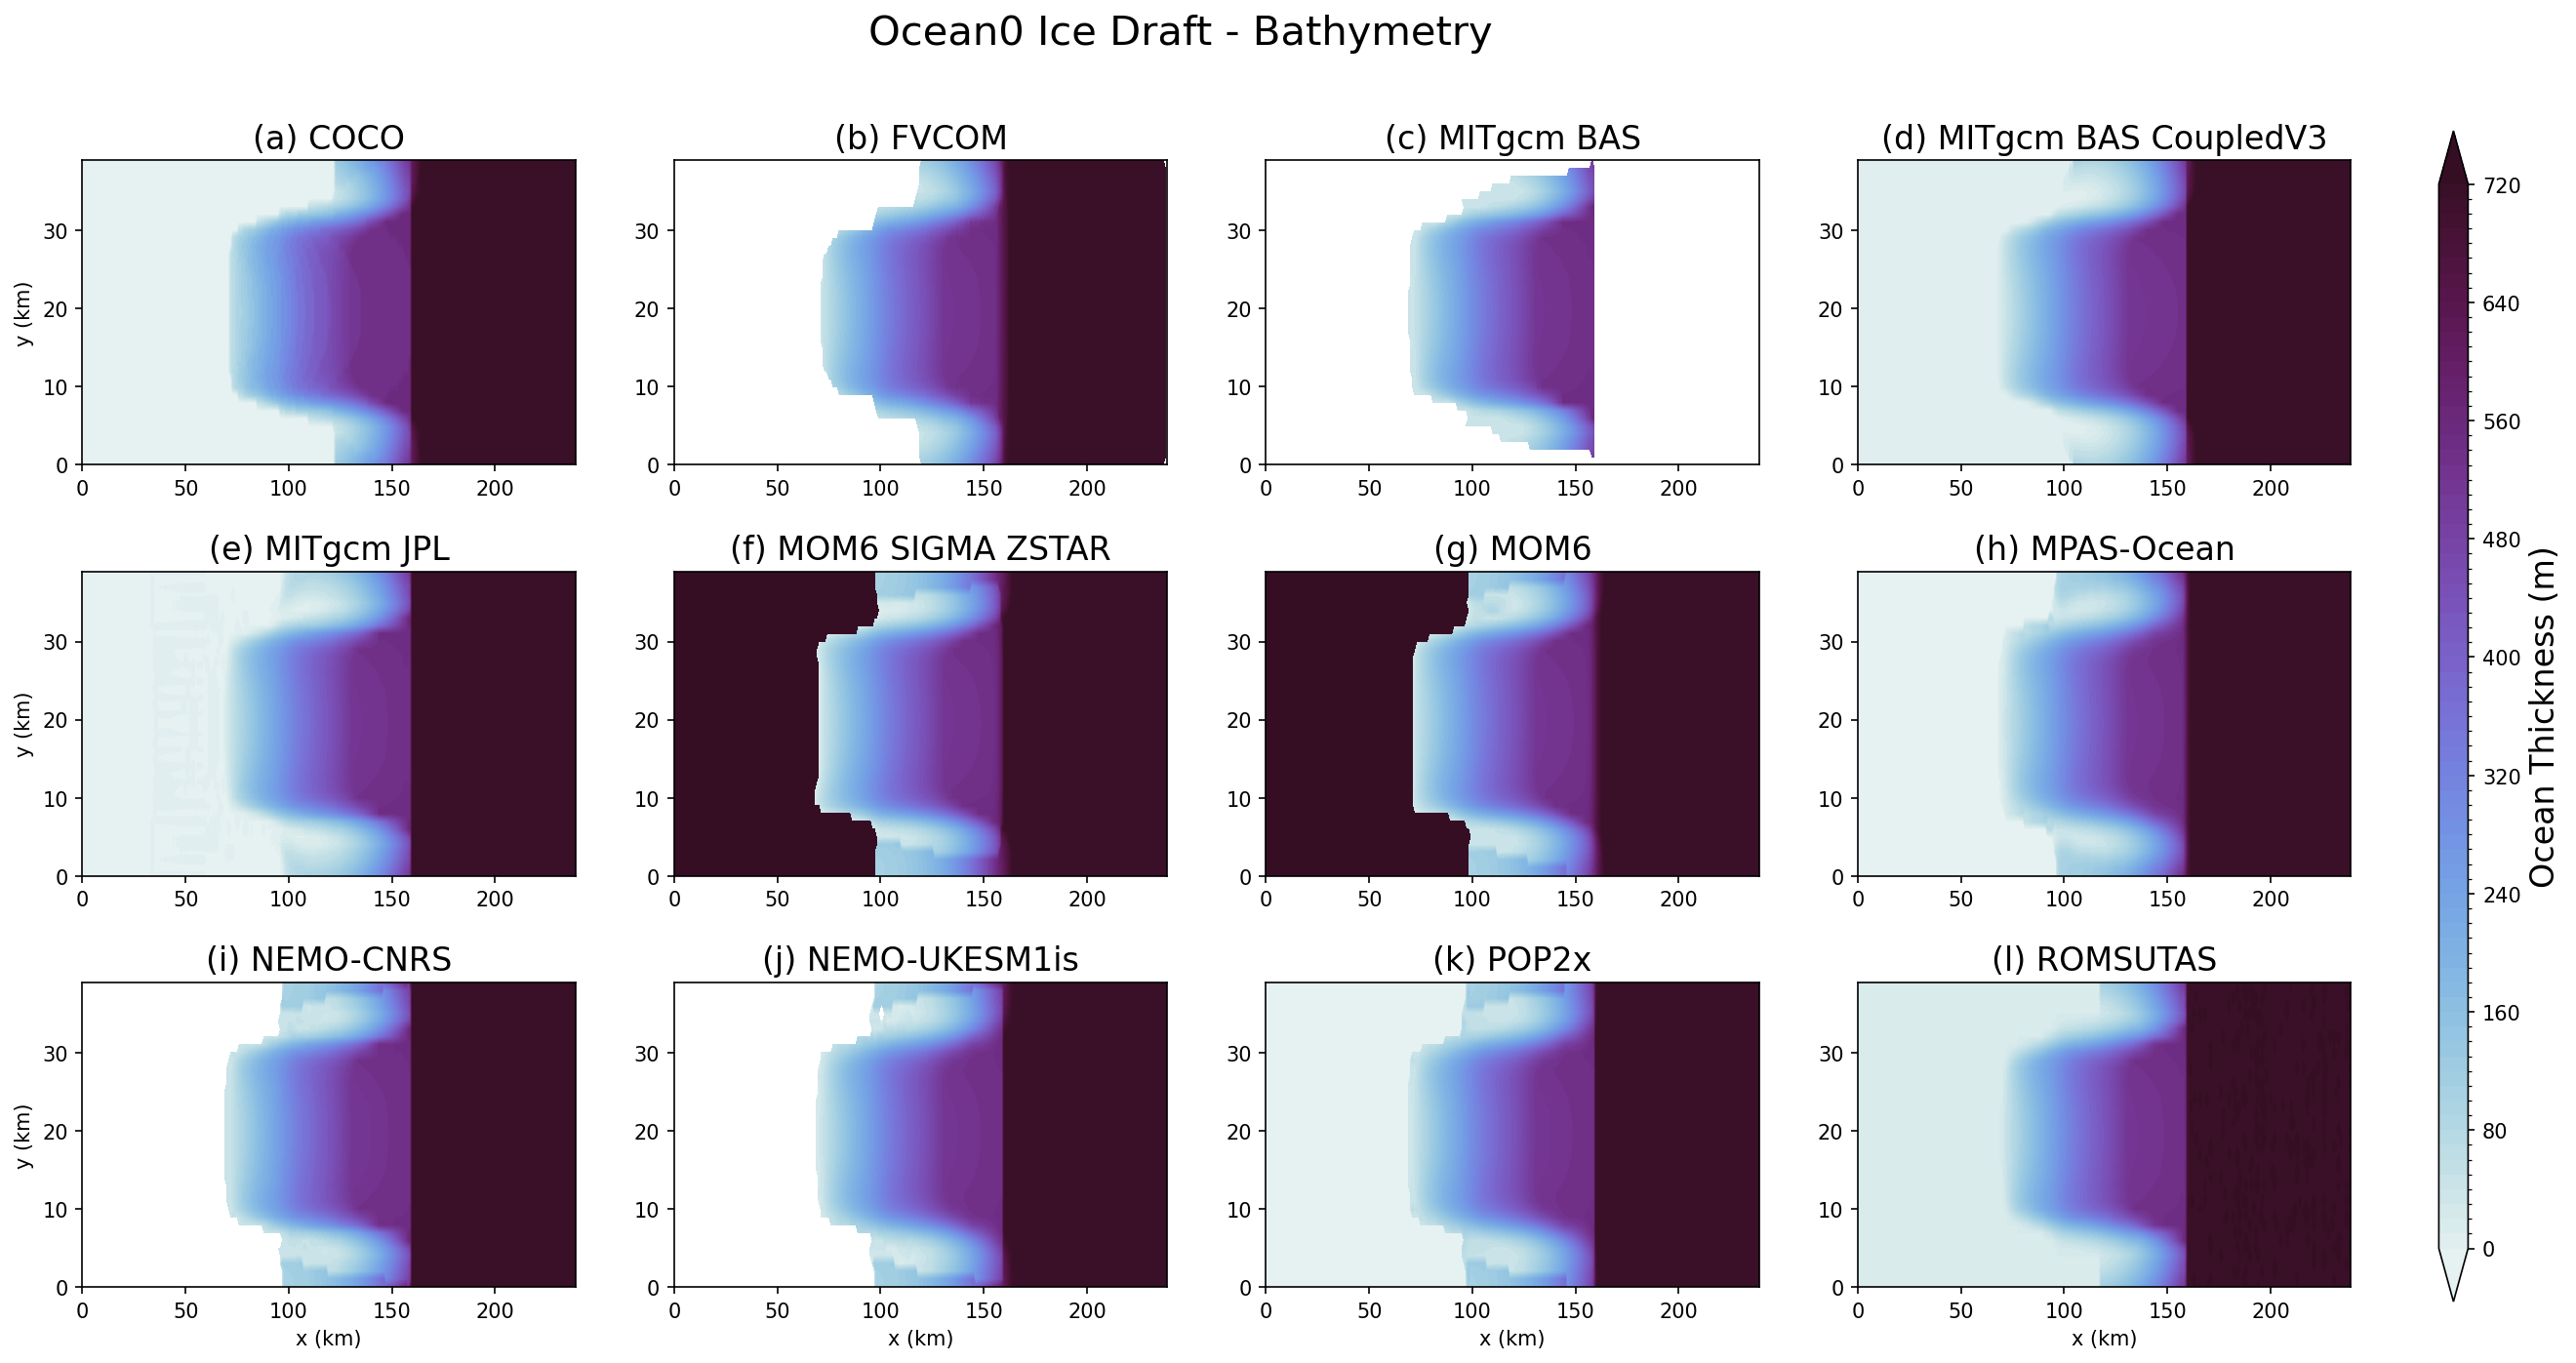

In [19]:
expt = Ocean0_COM
labels = []
for fileIndex in range(len(expt)):
    fileName = expt[fileIndex]
    baseName = os.path.basename(basedrive +fileName)
    modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
    labels.append(modelName)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig = plt.figure(figsize=(20,10),facecolor='w',dpi = 150)
time = 0
for i in np.arange(length):
    plt.subplot(3,nrows,i+1)
    data = xr.open_dataset(basedrive+expt[i], decode_times=False)
    try:
        draft = data.iceDraft.isel(nTime = time)
    except ValueError:
        draft = data.iceDraft#.isel(nTime = time)

    try:
        bathy = data.bathymetry.isel(nTime = time)
    except ValueError:
        bathy = data.bathymetry#.isel(nTime = time)
        
    c = (-1*np.abs(draft)+np.abs(bathy)).plot.contourf(cmap = cm.cm.dense, levels = np.linspace(0,720,73), extend = 'both',add_colorbar = False)#, cbar_kwargs = {'label':'Overturning \n Streamfunction (Sv)'},extend = 'both')

    plt.title('('+alphabet[i]+') '+labels[i], fontsize = 16)
    if (i==0) or (i==4) or (i==8):
        plt.ylabel('y (km)')
    else:
        plt.ylabel('')
    if i>=8:
        plt.xlabel('x (km)')
    else:
        plt.xlabel('')

cax = plt.axes([0.93,0.1,0.01,0.8])
cbar = plt.colorbar(c, cax = cax)
cbar.ax.set_ylabel('Ocean Thickness (m)', fontsize = 16)
fig.subplots_adjust(wspace = 0.2, hspace = 0.35)

fig.suptitle('Ocean0 Ice Draft - Bathymetry', fontsize = 20);